# 뉴욕 택시 데이터

<li>13억 대의 뉴욕 택시에 대한 정보, 파일-140개

In [1]:
# glob 라이브러리에 포함된 glob 메서드는 특정한 패턴의 이름을 가진 파일을 한 번에 읽어들일 수 있습니다.
import glob
import pandas as pd
nyc_taxi_data = glob.glob('../data/python_data/fhv_*')
print(nyc_taxi_data)

['../data/python_data\\fhv_tripdata_2015-01.csv', '../data/python_data\\fhv_tripdata_2015-02.csv', '../data/python_data\\fhv_tripdata_2015-03.csv', '../data/python_data\\fhv_tripdata_2015-04.csv', '../data/python_data\\fhv_tripdata_2015-05.csv']


In [2]:
taxi1 = pd.read_csv(nyc_taxi_data[0])
taxi2 = pd.read_csv(nyc_taxi_data[1])
taxi3 = pd.read_csv(nyc_taxi_data[2])
taxi4 = pd.read_csv(nyc_taxi_data[3])
taxi5 = pd.read_csv(nyc_taxi_data[4])

In [3]:
print(taxi1.head(n=2))
print(taxi2.head(n=2))
print(taxi3.head(n=2))
print(taxi4.head(n=2))
print(taxi5.head(n=2))

  Dispatching_base_num          Pickup_date  locationID
0               B00013  2015-01-01 00:30:00         NaN
1               B00013  2015-01-01 01:22:00         NaN
  Dispatching_base_num          Pickup_date  locationID
0               B00013  2015-02-01 00:00:00         NaN
1               B00013  2015-02-01 00:01:00         NaN
  Dispatching_base_num          Pickup_date  locationID
0               B00029  2015-03-01 00:02:00       213.0
1               B00029  2015-03-01 00:03:00        51.0
  Dispatching_base_num          Pickup_date  locationID
0               B00001  2015-04-01 04:30:00         NaN
1               B00001  2015-04-01 06:00:00         NaN
  Dispatching_base_num          Pickup_date  locationID
0               B00001  2015-05-01 04:30:00         NaN
1               B00001  2015-05-01 05:00:00         NaN


In [4]:
print(taxi1.shape)
print(taxi2.shape)
print(taxi3.shape)
print(taxi4.shape)
print(taxi5.shape)

(2746033, 3)
(3126401, 3)
(3281427, 3)
(3917789, 3)
(4296067, 3)


In [5]:
taxi = pd.concat([taxi1, taxi2, taxi3, taxi4, taxi5])

print(taxi.shape)

(17367717, 3)


# 반복문으로 데이터 준비하기

In [6]:
list_taxi_df = []

for csv_filename in  nyc_taxi_data:
    print(csv_filename)
    df = pd.read_csv(csv_filename)
    list_taxi_df.append(df)
    #print(df)
    
print(len(list_taxi_df))

../data/python_data\fhv_tripdata_2015-01.csv
../data/python_data\fhv_tripdata_2015-02.csv
../data/python_data\fhv_tripdata_2015-03.csv
../data/python_data\fhv_tripdata_2015-04.csv
../data/python_data\fhv_tripdata_2015-05.csv
5


In [7]:
print(type(list_taxi_df[0]))

<class 'pandas.core.frame.DataFrame'>


In [8]:
print(list_taxi_df[0].head())

  Dispatching_base_num          Pickup_date  locationID
0               B00013  2015-01-01 00:30:00         NaN
1               B00013  2015-01-01 01:22:00         NaN
2               B00013  2015-01-01 01:23:00         NaN
3               B00013  2015-01-01 01:44:00         NaN
4               B00013  2015-01-01 02:00:00         NaN


In [9]:
taxi_loop_concat = pd.concat(list_taxi_df)
print(taxi_loop_concat.shape)     #두가지  방법으로 할 수 있다.

(17367717, 3)


In [10]:
print(taxi.equals(taxi_loop_concat))

True


# 연습문제 (이상한 코드 정리하기)
## 1. 2000~2009년 출생한 남,여 파일을 읽어서 concat 시키세요.
## 2. 출생한 전체 남녀 합을 구하세요
## 3. 남녀 출생 추이 그래프를 그리세요.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [12]:
yob = glob.glob('../data/names/yob200*')
print(yob)
columns = ['name', 'sex', 'cnt']
years = range(2000, 2010)
print(years)

[]
range(2000, 2010)


In [13]:
list_yob = []
for yy in years:
    file = '../data/python_data/names/yob%d.txt' %yy
    print(file)
    df = pd.read_csv(file, header=None, names=columns)
    df['year'] = yy
    list_yob.append(df)

../data/python_data/names/yob2000.txt
../data/python_data/names/yob2001.txt
../data/python_data/names/yob2002.txt
../data/python_data/names/yob2003.txt
../data/python_data/names/yob2004.txt
../data/python_data/names/yob2005.txt
../data/python_data/names/yob2006.txt
../data/python_data/names/yob2007.txt
../data/python_data/names/yob2008.txt
../data/python_data/names/yob2009.txt


## 1. 2000~2009년 출생한 남,여 파일을 읽어서 concat 시키세요.

In [14]:
yob_df = pd.concat(list_yob)
yob_df.head()

,name,sex,cnt,year
0,Emily,F,25956,2000
1,Hannah,F,23082,2000
2,Madison,F,19968,2000
3,Ashley,F,17997,2000
4,Sarah,F,17702,2000


## 2. 출생한 전체 남녀 합을 구하세요

In [18]:
sex_sum = yob_df.groupby(['sex'])['cnt'].sum()
sex_sum

sex
F    18463899
M    19946991
Name: cnt, dtype: int64

## 3. 남녀 출생 추이 그래프를 그리세요.

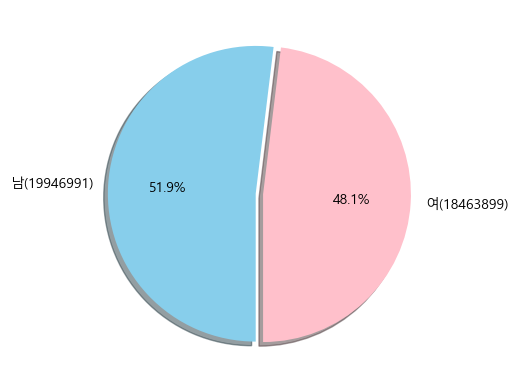

In [19]:
f, ax = plt.subplots(1,1)
labels = '여(' + str(sex_sum[0])+')', '남('+ str(sex_sum[1]) + ')'
sex_sum.plot.pie(autopct = '%1.1f%%', explode = (0, 0.05), shadow=True,
                startangle = -90, labels = labels,
                 colors = ['pink', 'skyblue'])
ax.set_ylabel('')
plt.show()

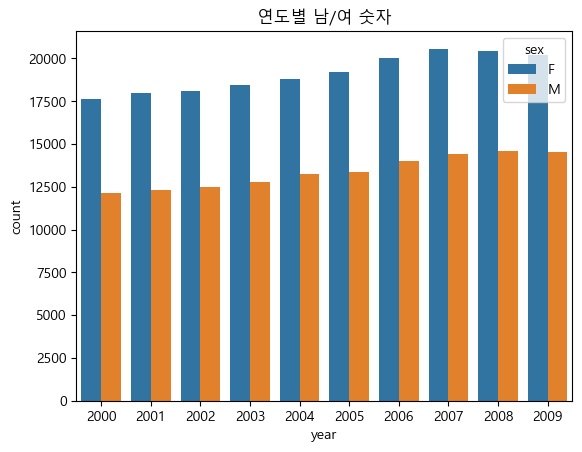

In [20]:
ax = plt.subplots()
ax = sns.countplot(x = 'year', hue = 'sex', data = yob_df)
ax.set_title('연도별 남/여 숫자')
plt.show()